

## Problem Statement: 
According to WHO, in 2019, the top 10 causes of death accounted for 55% of the 55.4 million deaths worldwide.

The top global causes of death, in order of total number of lives lost, are associated with three broad topics: cardiovascular (ischaemic heart disease, stroke), respiratory (chronic obstructive pulmonary disease, lower respiratory infections) and neonatal conditions – which include birth asphyxia and birth trauma, neonatal sepsis and infections, and preterm birth complications.

Causes of death can be grouped into three categories: 
- Communicable (infectious and parasitic diseases and maternal, perinatal and nutritional conditions) 
- Noncommunicable (chronic)  
- Injuries

## Introduction



**GOAL:** This project aims to carry out a detailed exploration and visualization of the leading causes of death globally using the 'Death Cause Reason by Country' datasets.
The dataset can be found
<a href="https://www.kaggle.com/code/merorap/detailed-analysis-of-deaths-by-country-eda/data">here</a>
. 
 
 The key points to consider are as follows:
 
* Total number of deaths per cause across the globe
* Analysis of the leading cause of death
* Analysis of the top 10 countries with the most recorded deaths from the leading cause


In [6]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("Death Cause Reason by Country.csv")
pd.set_option('display.max_columns',50)

### Exploratory Data Analysis and Statistics

In [8]:
df.head()

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
0,Afghanistan,2201.0,61995,7082,5637,23701,1563,530,5015,318,3627,4038,18697,147,4320,525,1244,1775,560,1940,6929,3797,1210,21247,485,1687,406,8254,59,1613,24295,4817
1,Albania,1181.0,12904,815,329,161,13,0,57,2,11,3,457,18,7,11,5,917,248,1,527,333,3,4705,18,36,29,243,4,152,0,175
2,Algeria,2762.0,97931,7528,8201,8756,292,0,459,264,445,638,5786,111,527,351,114,5209,1283,259,6398,4045,92,23816,782,526,526,11051,40,1515,13,5328
3,Andorra,84.0,169,39,16,0,0,0,0,3,0,0,20,1,1,0,0,36,7,1,27,12,0,230,0,0,0,8,0,8,0,9
4,Angola,33.0,25724,3934,2464,18189,2520,10784,974,16802,11752,2069,12783,211,12936,433,3015,1143,267,246,8971,5666,2906,12791,513,793,80,9253,114,1928,16,4033


In [9]:
df.describe()

,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
count,188.000000,1.910000e+02,1.910000e+02,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,10461.404255,9.808936e+04,2.104242e+04,7490.712042,9759.513089,1217.586387,3275.036649,2157.356021,4378.549738,6071.649215,1009.696335,13151.413613,887.256545,7933.884817,401.486911,1296.534031,8665.931937,1939.738220,412.099476,13517.874346,7735.287958,1091.073298,5.372821e+04,580.554974,1237.518325,684.08377,6246.371728,248.068063,3987.272251,327.717277,8120.701571
std,35107.423980,3.956782e+05,1.162353e+05,24085.215522,39729.671493,4486.652415,15318.488537,6791.964692,14466.789042,31918.460441,3668.775336,38659.050273,3299.052799,48146.916517,2046.335796,3396.623938,30267.513326,7083.417114,2394.044061,42769.724739,24837.061881,2641.713655,2.194755e+05,2129.850424,5733.965491,4873.21600,24346.918766,1138.294126,17190.775429,2078.774610,26275.139588
min,1.000000,8.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,84.750000,4.648500e+03,5.295000e+02,342.000000,104.500000,13.500000,0.000000,55.500000,22.000000,30.500000,4.500000,530.500000,21.500000,30.500000,8.500000,10.000000,323.500000,77.500000,2.000000,592.500000,307.000000,5.000000,2.183500e+03,23.000000,37.000000,11.00000,187.500000,4.000000,174.000000,0.000000,412.500000
50%,612.500000,1.815700e+04,2.529000e+03,1813.000000,549.000000,83.000000,0.000000,316.000000,171.000000,329.000000,40.000000,2454.000000,126.000000,268.000000,47.000000,121.000000,1295.000000,328.000000,12.000000,3226.000000,1809.000000,94.000000,1.008400e+04,117.000000,167.000000,53.00000,1049.000000,24.000000,671.000000,0.000000,1899.000000
75%,3986.750000,5.737250e+04,7.118000e+03,4773.500000,5296.500000,474.000000,92.000000,945.000000,1813.500000,2284.500000,554.000000,12229.500000,387.500000,3016.000000,249.000000,857.500000,4827.000000,1012.000000,130.500000,8585.500000,4737.500000,716.000000,2.958100e+04,505.500000,689.500000,201.50000,4352.500000,114.500000,2197.000000,5.000000,4736.500000
max,353948.000000,4.584273e+06,1.168381e+06,222922.000000,438004.000000,44914.000000,191106.000000,65907.000000,143851.000000,422634.000000,41843.000000,433661.000000,28460.000000,632345.000000,27084.000000,26868.000000,320715.000000,76990.000000,30987.000000,464914.000000,270037.000000,18641.000000,2.716551e+06,25876.000000,56524.000000,65717.00000,250025.000000,11348.000000,195336.000000,24295.000000,273089.000000


In [10]:
df.shape

(191, 32)

**The dataset contains 191 rows and 32 columns**

#### Let's view it from below.

In [5]:
df.tail(15)

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
176,Turkmenistan,NaN,18323,442,712,1113,52,0,214,105,437,55,1284,180,75,37,11,582,108,43,2749,2381,6,3636,116,129,66,284,136,440,0,759
177,Tuvalu,3.0,42,7,5,1,0,0,1,1,1,0,5,0,1,0,0,2,1,0,4,2,0,14,0,1,0,3,0,2,0,11
178,Uganda,265.0,28149,5480,3386,30955,3941,22587,2378,20762,13886,2121,16497,261,10955,545,3937,1854,417,390,9155,5189,3824,21648,616,751,46,5563,152,2167,61,5033
179,Ukraine,19437.0,449376,12181,2660,1305,399,0,5279,6643,4043,81,8734,7716,83,1539,139,16370,3586,72,30240,20141,67,99218,2198,3436,1477,6980,2733,13690,227,2821
180,United Arab Emirates,671.0,8621,1778,1433,83,54,0,87,160,119,12,599,76,60,42,7,138,90,69,734,506,3,5473,190,174,805,3833,12,664,0,1325
181,United Kingdom,74185.0,188113,51879,7776,1484,265,0,339,233,390,40,41877,1762,1419,135,159,32425,7906,22,33215,10031,118,195999,383,300,2654,2696,128,5618,2,6368
182,United States,353948.0,957455,224988,106954,10994,1146,0,17709,7053,978,990,81921,14044,11727,1528,6090,143919,32211,131,129343,67286,5710,773895,3616,3615,65717,41362,1378,45349,31,77719
183,Uruguay,193.0,10003,2155,989,148,14,0,212,177,56,10,1595,111,165,16,134,1497,349,1,1546,471,104,10084,67,71,15,560,6,666,0,895
184,Uzbekistan,614.0,107394,3837,3971,5257,175,0,974,585,2445,228,10787,156,161,368,41,1119,544,130,15019,13042,9,22338,684,1597,188,4929,178,3793,0,8154
185,Venezuela,1030.0,61510,7062,10405,3338,254,667,10944,1850,826,497,5555,188,1418,82,552,6313,1119,21,8601,4692,527,34771,196,524,90,6207,11,2310,0,10795


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country Name                                 191 non-null    object 
 1   Covid-19 Deaths                              188 non-null    float64
 2   Cardiovascular diseases                      191 non-null    int64  
 3   Respiratory diseases                         191 non-null    int64  
 4   Kidney diseases                              191 non-null    int64  
 5   Neonatal disorders                           191 non-null    int64  
 6   Meningitis                                   191 non-null    int64  
 7   Malaria                                      191 non-null    int64  
 8   Interpersonal violence                       191 non-null    int64  
 9   HIV/AIDS                                     191 non-null    int64  
 10  Tu

The columns are mostly made up of numeric values except for that of country.
#### Let's check the top 10 countries with the highest number of deaths from a given disease

In [12]:
causes = list(df.columns)
causes = causes[1:-2]
causes

['Covid-19 Deaths',
 'Cardiovascular diseases',
 'Respiratory diseases ',
 'Kidney diseases',
 'Neonatal disorders ',
 'Meningitis ',
 'Malaria ',
 'Interpersonal violence',
 'HIV/AIDS',
 'Tuberculosis',
 'Maternal disorders',
 'Lower respiratory infections',
 'Alcohol use disorders',
 'Diarrheal diseases',
 'Poisoning',
 'Nutritional deficiencies',
 " Alzheimer's disease",
 "Parkinson's disease",
 ' Acute hepatitis',
 'Digestive diseases',
 ' Cirrhosis and other chronic liver diseases',
 'Protein-energy malnutrition',
 'Neoplasms',
 'Fire, heat',
 'Drowning',
 'Drug use disorders',
 'Road injuries',
 'Environmental heat and cold exposure',
 'Self-harm']

In [15]:
#Top 10 countries with the highest number of deaths from a given disease
causes_10 = {}
for cause in causes:
    top_ten = df[["Country Name", cause]].sort_values(ascending=False,by=cause)
    causes_10[cause] = top_ten[:10]
    print('The top 10 countries: \n', top_ten[:10])

The top 10 countries: 
        Country Name  Covid-19 Deaths
182   United States         353948.0
24           Brazil         195541.0
75            India         149218.0
104          Mexico         126507.0
133            Peru          93231.0
81            Italy          74621.0
54          England          74185.0
181  United Kingdom          74185.0
59           France          64777.0
140          Russia          56798.0
The top 10 countries: 
       Country Name  Cardiovascular diseases
35           China                  4584273
75           India                  2574410
140         Russia                  1004931
182  United States                   957455
76       Indonesia                   651481
179        Ukraine                   449376
24          Brazil                   397993
83           Japan                   372483
63         Germany                   364285
127       Pakistan                   341108
The top 10 countries: 
        Country Name  Respiratory dise

,Country Name,Diseases
75,India,NaN
35,China,NaN
182,United States,NaN
140,Russia,NaN
83,Japan,NaN


In [10]:
print("Total null values of all columns:\n ", df.isnull().sum())

Total null values of all columns:
  Country Name                                   0
Covid-19 Deaths                                3
Cardiovascular diseases                        0
Respiratory diseases                           0
Kidney diseases                                0
Neonatal disorders                             0
Meningitis                                     0
Malaria                                        0
Interpersonal violence                         0
HIV/AIDS                                       0
Tuberculosis                                   0
Maternal disorders                             0
Lower respiratory infections                   0
Alcohol use disorders                          0
Diarrheal diseases                             0
Poisoning                                      0
Nutritional deficiencies                       0
 Alzheimer's disease                           0
Parkinson's disease                            0
 Acute hepatitis                 

- There are three null values in the covid-19 column, which is actually negligible. 

## Let's make some visualizations

### Top 10 countries affected mostly by each disease

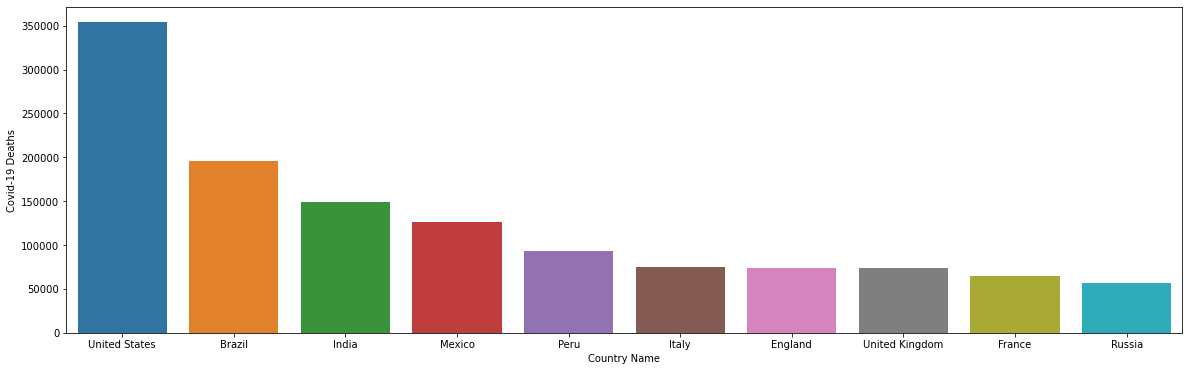

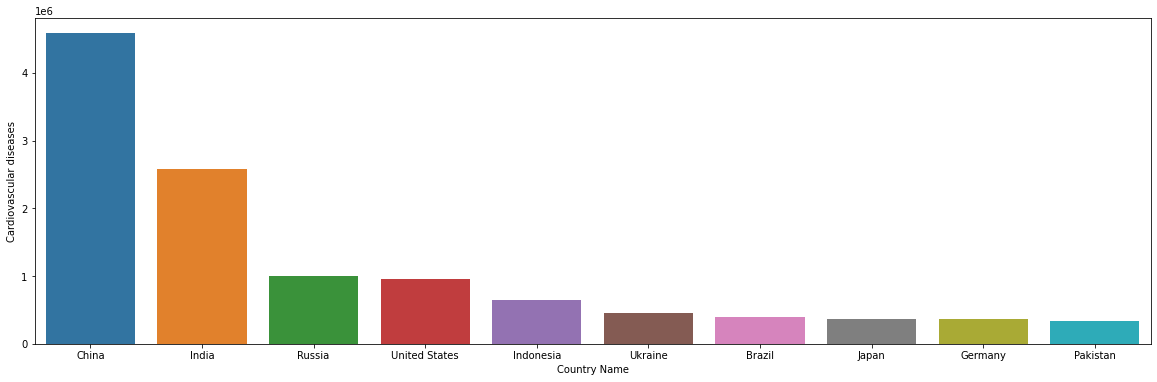

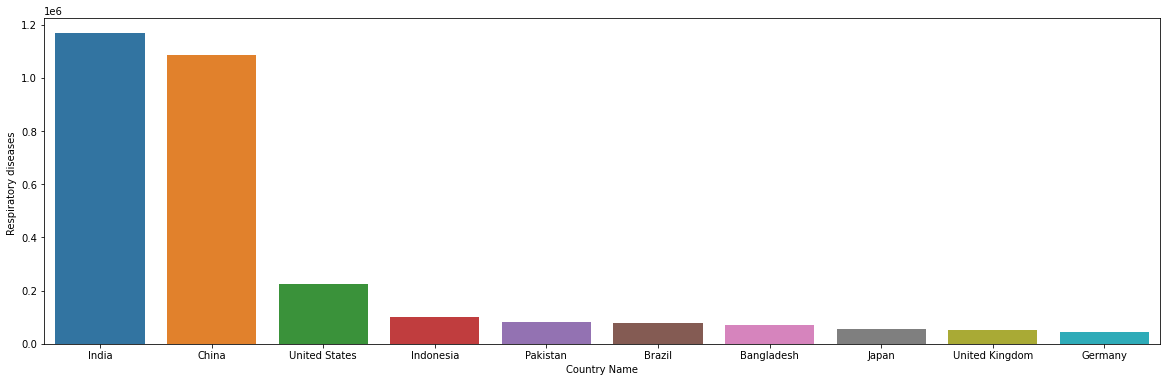

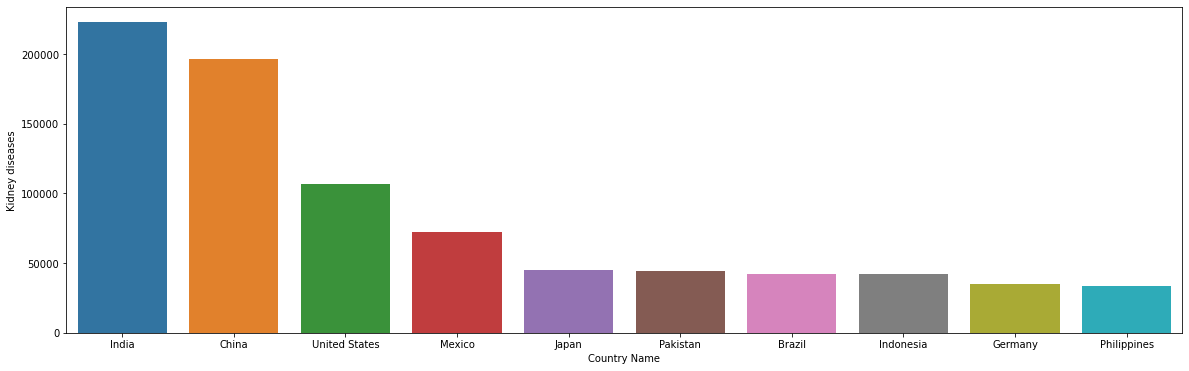

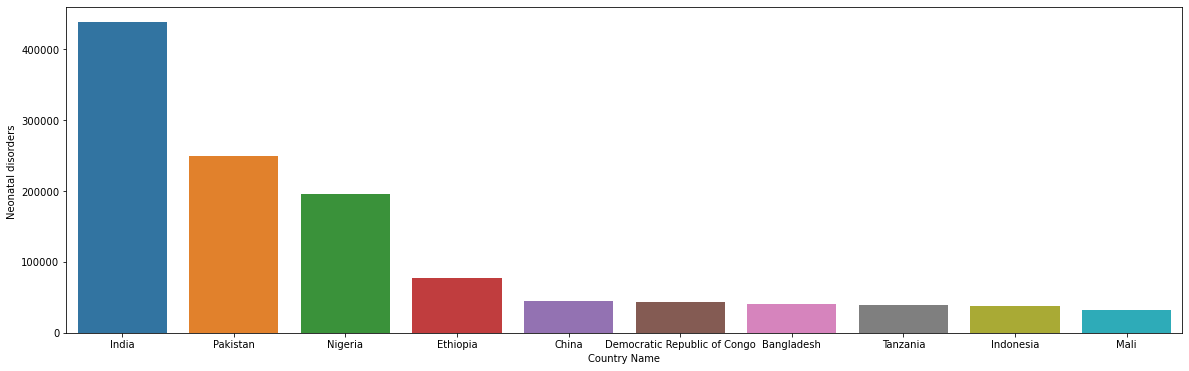

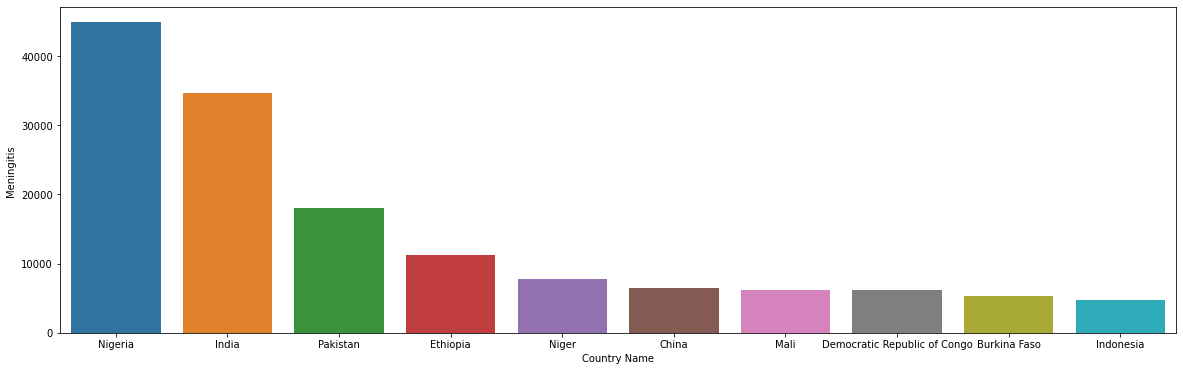

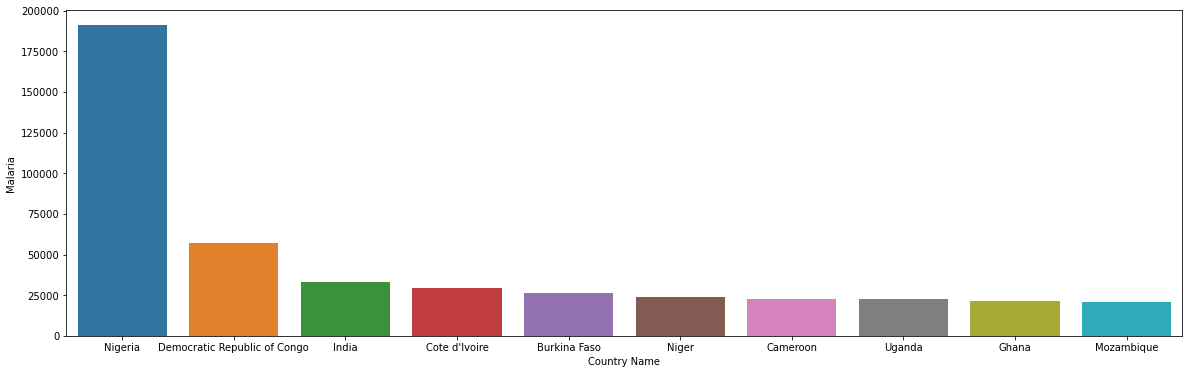

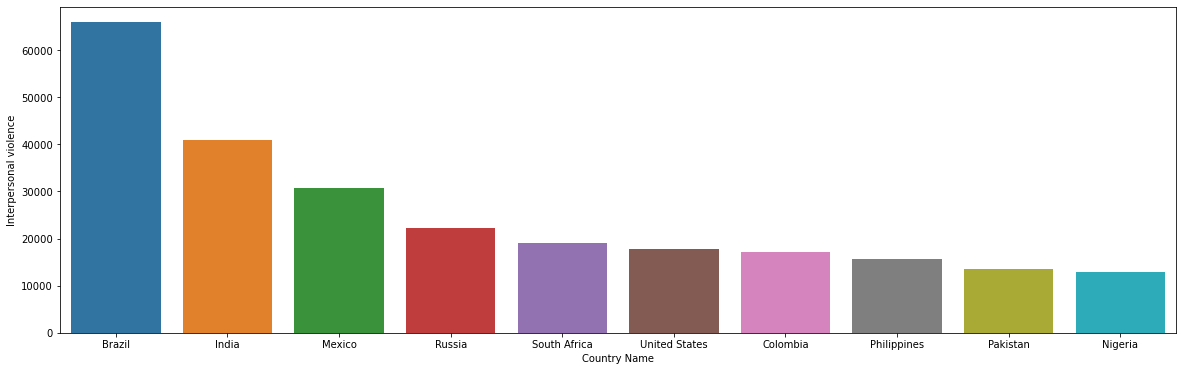

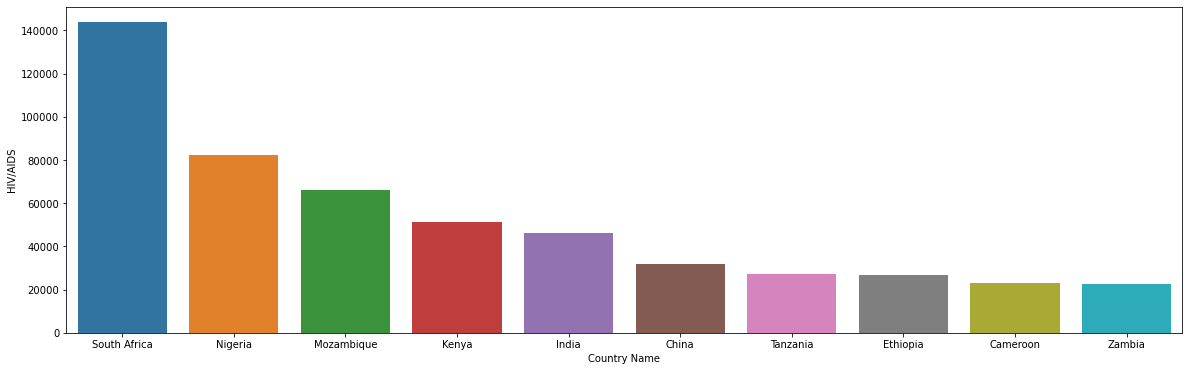

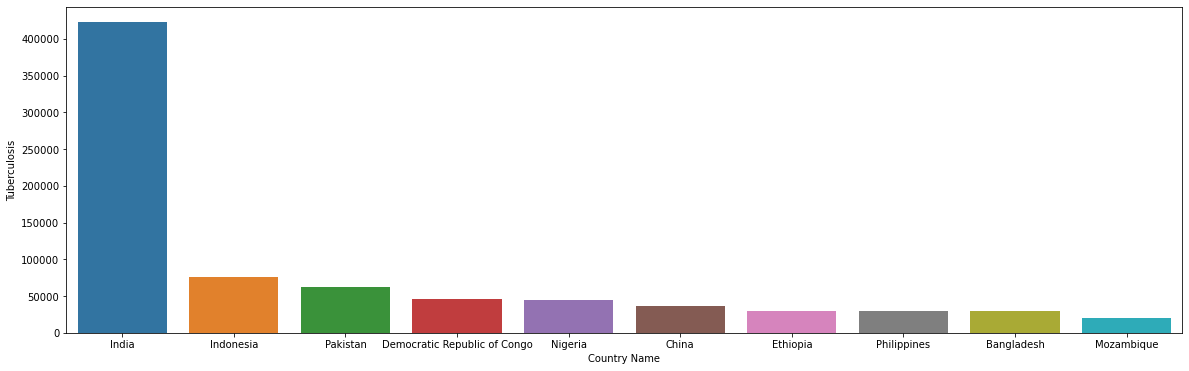

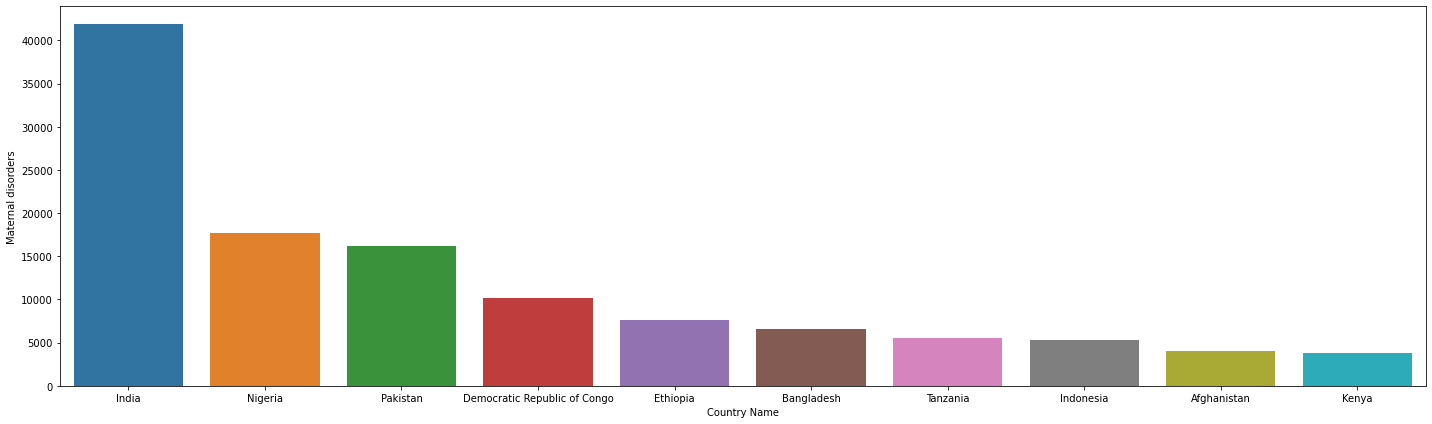

In [11]:
for cause in causes[:11]:
    f = plt.figure(figsize=(20, 6))
    sns.barplot(x = "Country Name", y = cause, data = causes_10[cause])
    
gs = f.add_gridspec(6, 6)    
f.tight_layout()

## Wordcloud of all the countries in the dataset.

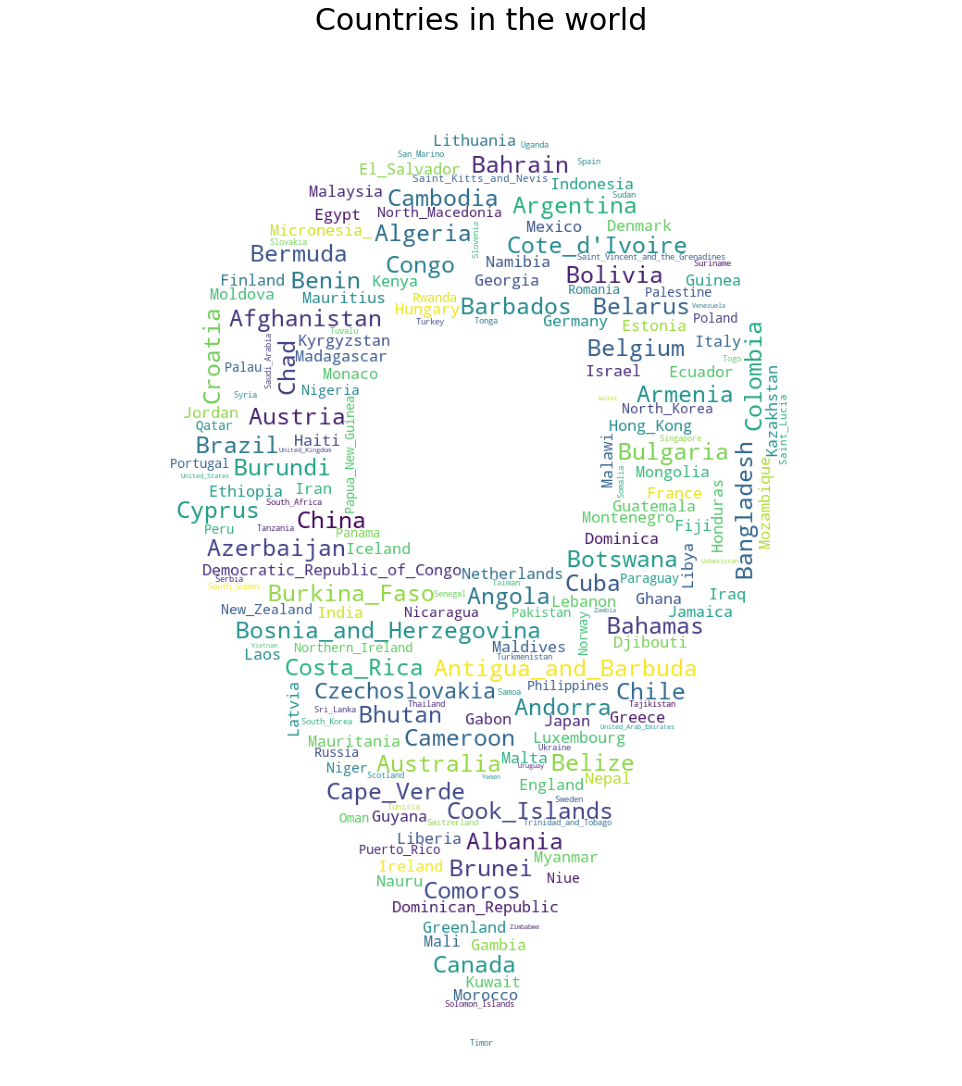

In [16]:
words = ''
for i in list(df["Country Name"]):
        i = i.replace(" ", "_") + " "
        words+= i
        
wordcloud = WordCloud(background_color='white',
                    max_font_size = 25, 
                    random_state = 55,
                    mask = np.array(Image.open('loc.png'))
                     )

wordcloud.generate(str(words))                    
plt.figure(figsize=(18,15))
plt.title("Countries in the world",fontsize= 30, x=0.5, y=1.1)
plt.axis('off');
plt.tight_layout()  
plt.imshow(wordcloud);

* **Let's show the top 5 countries that have the greatest number of deaths from a particular disease.**

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''


covid_10 = list(causes_10["Covid-19 Deaths"]["Country Name"])

for country in covid_10:

    causes_death = []
    value = []
    causes_death = list(df[df["Country Name"] == country].columns)
    causes_death = causes_death[1: -2]
    value = df[df["Country Name"] == country].values.tolist()
    value = value[0][1: -2]
    number = value
    per_val = np.array(number)
    percent = 100.*per_val/per_val.sum()
    
    size = 0.35
    plt.figure(figsize=(15, 15))
    patches, texts = plt.pie(number,startangle=90, radius=1 - size, wedgeprops=dict(width=size, edgecolor='w'))  
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(causes_death, percent)]  
  
    sort_legend = True  
    if sort_legend:  
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, number),  
                                              key=lambda causes_death: causes_death[2],  
                                              reverse=True))  
  
    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.05, 1), fontsize=12) 
    plt.rcParams['axes.titley'] = 0.85 
    plt.title(country, fontsize=25)
    
    
    plt.show()

Correlation plot of all diseases

<AxesSubplot:>

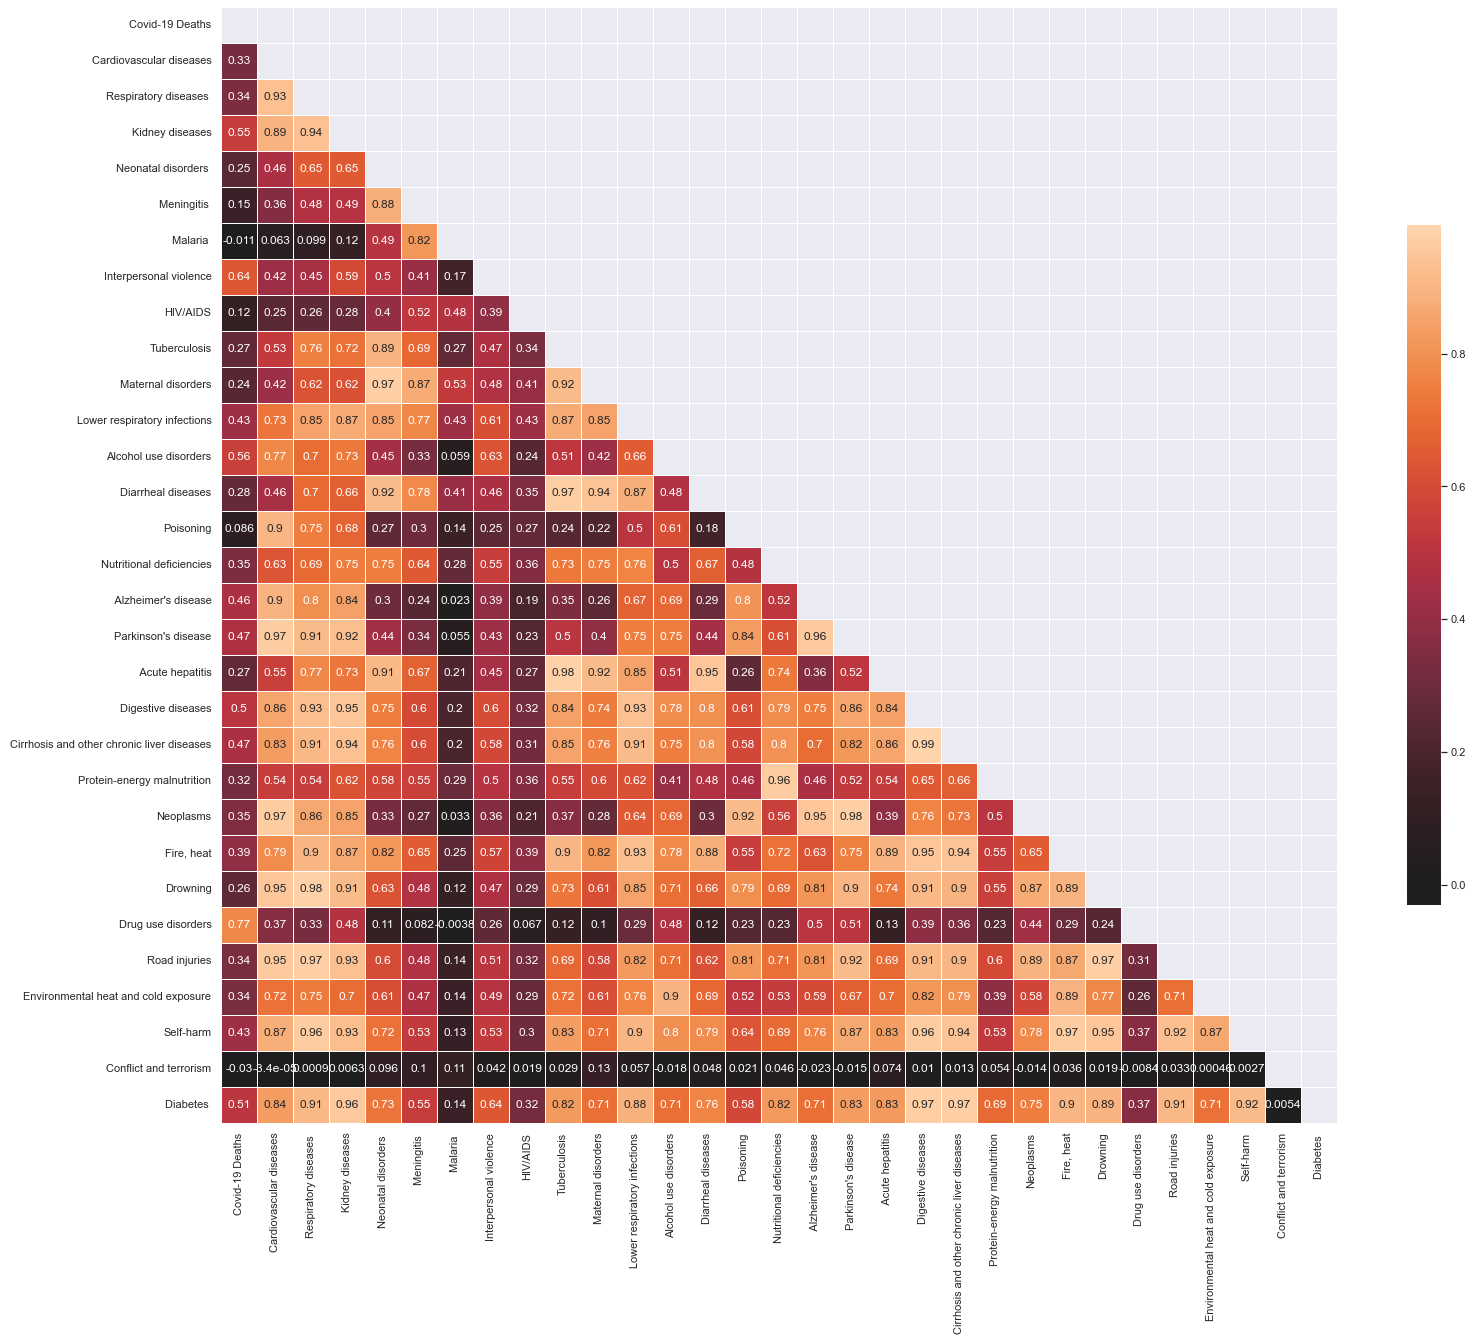

In [14]:
sns.set_theme(style="darkgrid")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(230, 20)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.5,cbar_kws={"shrink": 0.5})         


In [15]:
countries= df.sum(axis=0)[1:].sort_values(ascending=True).index
total_death = df.sum(axis=0)[1:].sort_values(ascending=True).values

print("\033[1m"+"Causes of death (sorted in ascending order) "+"\033[0m")         
for i in range(0,len(countries)):
    print(countries[i],"=",f'{total_death[i]:,}')     

countries= df.sum(axis=0)[1:].sort_values(ascending=False).index
total_death = df.sum(axis=0)[1:].sort_values(ascending=False).values

print("\033[1m"+"\nTotal death ="+"\n",
     f'{ np.sum(df.sum(axis=0)[1:].sort_values(ascending=False).values) :,}')



Causes of death (sorted in ascending order) 
Environmental heat and cold exposure = 47,381
 Conflict and terrorism = 62,594
Poisoning = 76,684
 Acute hepatitis = 78,711
Fire, heat = 110,886
Drug use disorders = 130,660
Alcohol use disorders = 169,466
Maternal disorders = 192,852
Protein-energy malnutrition = 208,395
Meningitis  = 232,559
Drowning = 236,366
Nutritional deficiencies = 247,638
Parkinson's disease = 370,490
Interpersonal violence = 412,055
Malaria  = 625,532
Self-harm = 761,569
HIV/AIDS = 836,303
Tuberculosis = 1,159,685
Road injuries = 1,193,057
Kidney diseases = 1,430,726
 Cirrhosis and other chronic liver diseases = 1,477,440
Diarrheal diseases = 1,515,372
Diabetes  = 1,551,054
 Alzheimer's disease = 1,655,193
Neonatal disorders  = 1,864,067
Covid-19 Deaths = 1,966,744.0
Lower respiratory infections = 2,511,920
Digestive diseases = 2,581,914
Respiratory diseases  = 4,019,102
Neoplasms = 10,262,088
Cardiovascular diseases = 18,735,068

Total death =
 56,723,571.0


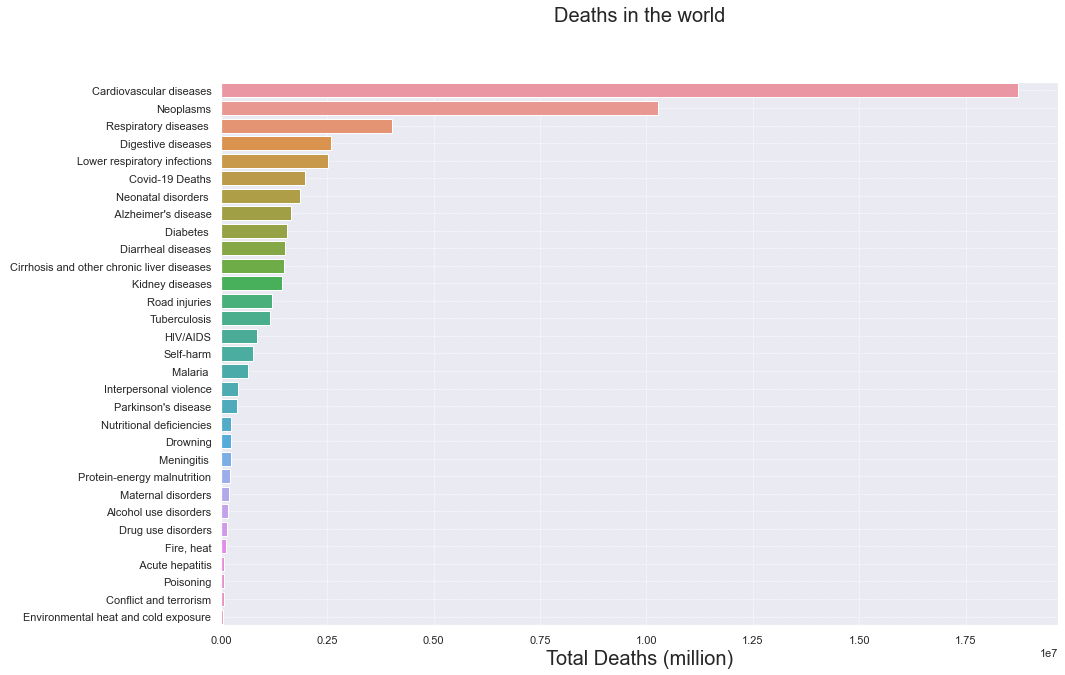

In [17]:
fig, ax = plt.subplots(figsize =(15, 10))
sns.barplot(total_death,countries)
plt.grid(linestyle='--', linewidth=.6)
plt.title("Deaths in the world",fontsize=20, x=0.5, y=1.1)
plt.xlabel("Total Deaths (million)",fontsize=20)
plt.show()

In [18]:
countries = df.loc[ df["Covid-19 Deaths"].sort_values(ascending=True)[:5].index]["Country Name" ].values
total_death = df["Covid-19 Deaths"].sort_values(ascending=True)[:5].values

print("\033[1m"+"5 countries with the lowest death rates from covid-19"+"\033[0m")         
for i in range(0,len(countries)):
    print(countries[i],"=",f'{total_death[i]:,}')     

countries = df.loc[ df["Covid-19 Deaths"].sort_values(ascending=False)[:5].index]["Country Name" ].values
total_death = df["Covid-19 Deaths"].sort_values(ascending=False)[:5].values

print("\033[1m"+"\n5 countries with the highest death rates from covid-19"+"\033[0m")         
for i in range(0,len(countries)):
    print(countries[i],"=",f'{total_death[i]:,}')  
   
print("\033[1m"+"\nTotal death toll from covid-19 ="+"\033[0m",
     f'{ df["Covid-19 Deaths"].sort_values(ascending=False).sum() :,}')

5 countries with the lowest death rates from covid-19
Mongolia = 1.0
Fiji = 2.0
Dominica = 2.0
Solomon Islands = 2.0
Micronesia  = 2.0

5 countries with the highest death rates from covid-19
United States = 353,948.0
Brazil = 195,541.0
India = 149,218.0
Mexico = 126,507.0
Peru = 93,231.0

Total death toll from covid-19 = 1,966,744.0


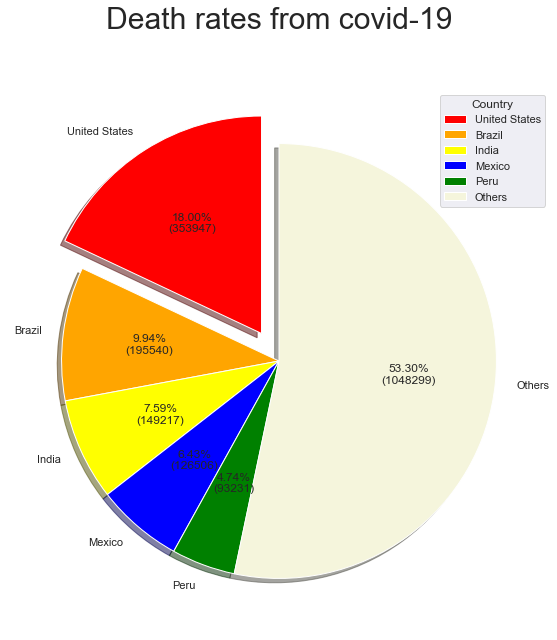

In [19]:
all_others_covid = df["Covid-19 Deaths"].sort_values(ascending=False)[5:].sum()
total_death = np.append(total_death,all_others_covid)
countries = np.append(countries,"Others")

colors = ( "red", "orange", "yellow",
          "blue", "green", "beige")

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 10))

wedges, texts, autotexts = ax.pie(total_death,
                                  autopct = lambda pct: func(pct, total_death),
                                  labels = countries ,
                                   explode = [0.15, 0, 0, 0, 0, 0],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,)

plt.title("Death rates from covid-19",fontsize= 30, x=0.5, y=1.1)
plt.legend(title = "Country",loc ="upper right")
plt.show() 

In [23]:
countries = df.loc[ df["Cardiovascular diseases"].sort_values(ascending=True)[:5].index]["Country Name" ].values
total_death = df["Cardiovascular diseases"].sort_values(ascending=True)[:5].values

print("\033[1m"+"5 countries with the lowest death rates from Cardiovascular diseases"+"\033[0m")         
for i in range(0,len(countries)):
    print(countries[i],"=",total_death[i])    

countries = df.loc[ df["Cardiovascular diseases"].sort_values(ascending=False)[:5].index]["Country Name" ].values
total_death = df["Cardiovascular diseases"].sort_values(ascending=False)[:5].values

print("\033[1m"+"\n5 countries with the highest death rates from Cardiovascular diseases"+"\033[0m")         
for i in range(0,len(countries)):
    print(countries[i],"=",f'{total_death[i]:,}')
   
print("\033[1m"+"\nTotal death toll from Cardiovascular diseases ="+"\033[0m",
      f'{ df["Cardiovascular diseases"].sort_values(ascending=False).sum() :,}')



5 countries with the lowest death rates from Cardiovascular diseases
Niue = 8
Nauru = 23
Tuvalu = 42
Cook Islands = 58
Palau = 65

5 countries with the highest death rates from Cardiovascular diseases
China = 4,584,273
India = 2,574,410
Russia = 1,004,931
United States = 957,455
Indonesia = 651,481

Total death toll from Cardiovascular diseases = 18,735,068


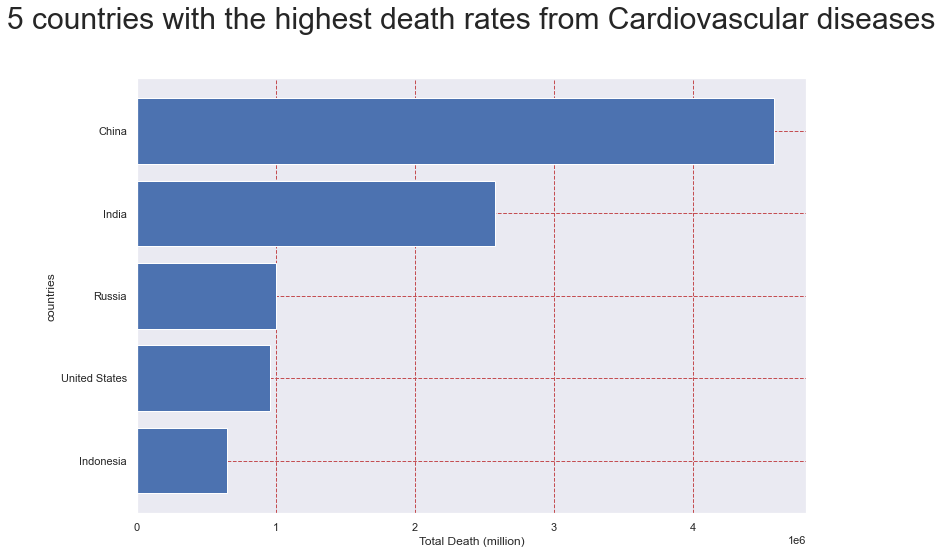

In [24]:
fig, ax = plt.subplots(figsize =(12,8))

plt.grid(color='r', linestyle='--', linewidth=1)
plt.barh(countries, total_death )

plt.title("5 countries with the highest death rates from Cardiovascular diseases",fontsize= 30, x=0.5, y=1.1)
plt.ylabel('countries')
plt.xlabel('Total Death (million)')
ax.invert_yaxis()

plt.show()

Through our explorations, we can deduce the following from our data:
- **Cadiovascular (All Heart realted)** diseases has more victims and **China** has the highest number of deaths around the world.

- The total death toll from Cardiovascular diseases is **18,735,068**

- **The Total death** from all the diseases contained in this dataset is **56,723,571**.

- **India** leads the way for the number of deaths from **Respiratory, Neonatal and Kidney diseases, with  1,168,381, 43800,  and 222,922** respectively.
- **India** also lead the way with  **422634 deaths from tuberculosis**.

- **Nigeria** leads the way with **44,914 deaths from Meningitis** and **191,106 from Malaria**.

- **The United States** lead the way with **353,948 deaths from Covid-19**.

- Conclusively, we can say that India has the highest cumulative number of deaths from all the disease categories put together as they rank amongst the top 2 or 3 in other categories. 

